# ISS Radiation Sensor Analysis with Pandas!

Made by: Spyridon Grammenos

NASA's SPDF Database provides real data from the International Space Station's Radiation Sensors
This script uses Pandas and Matplotlib to convert the raw data into plots and visualizations that help understand how radiation affects LEO satellites.

Feel free to use and reshare for Educational purposes!

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.image as img
import matplotlib.cm as cm
#mapimage for the mapplots
mapImage = img.imread('map.png') #map image used for long/lat plots

In [2]:
names = ['Epoch', 'Avg_Dose_Rate', "Avg_EQV_Dose_Rate","Sample_Collection_Time", "Longtitude", "Latitude","Altitude"]
issData = pd.read_csv("ISS_DOSANL_TEPC_58605.csv")
issData.columns = names
issData.head()

,Epoch,Avg_Dose_Rate,Avg_EQV_Dose_Rate,Sample_Collection_Time,Longtitude,Latitude,Altitude
0,2018-04-10T22:00:39.000Z,0.093,0.126,1.0,37.375,-34.162,415.342
1,2018-04-10T22:01:39.000Z,0.103,0.266,1.0,40.740,-36.686,416.281
2,2018-04-10T22:02:39.000Z,0.131,0.404,1.0,44.345,-39.092,417.183
3,2018-04-10T22:03:39.000Z,0.139,0.383,1.0,48.215,-41.361,418.034
4,2018-04-10T22:04:39.000Z,0.197,0.926,1.0,52.364,-43.470,418.818


In [3]:
#formatting and setting the Epoch as index
issData["Epoch"] = issData["Epoch"].apply(lambda x:x.split('Z')[0]) #remove Zulu to make time easier to parse/read
issData["Epoch"] = pd.to_datetime(issData["Epoch"]) # parse to datetime
issData.set_index('Epoch', inplace = True) #set Epoch as the index of the dataframe

# Altitude and Orbit Plot
The next plot shows how the altitude of the ISS flactuates as it from pole to pole

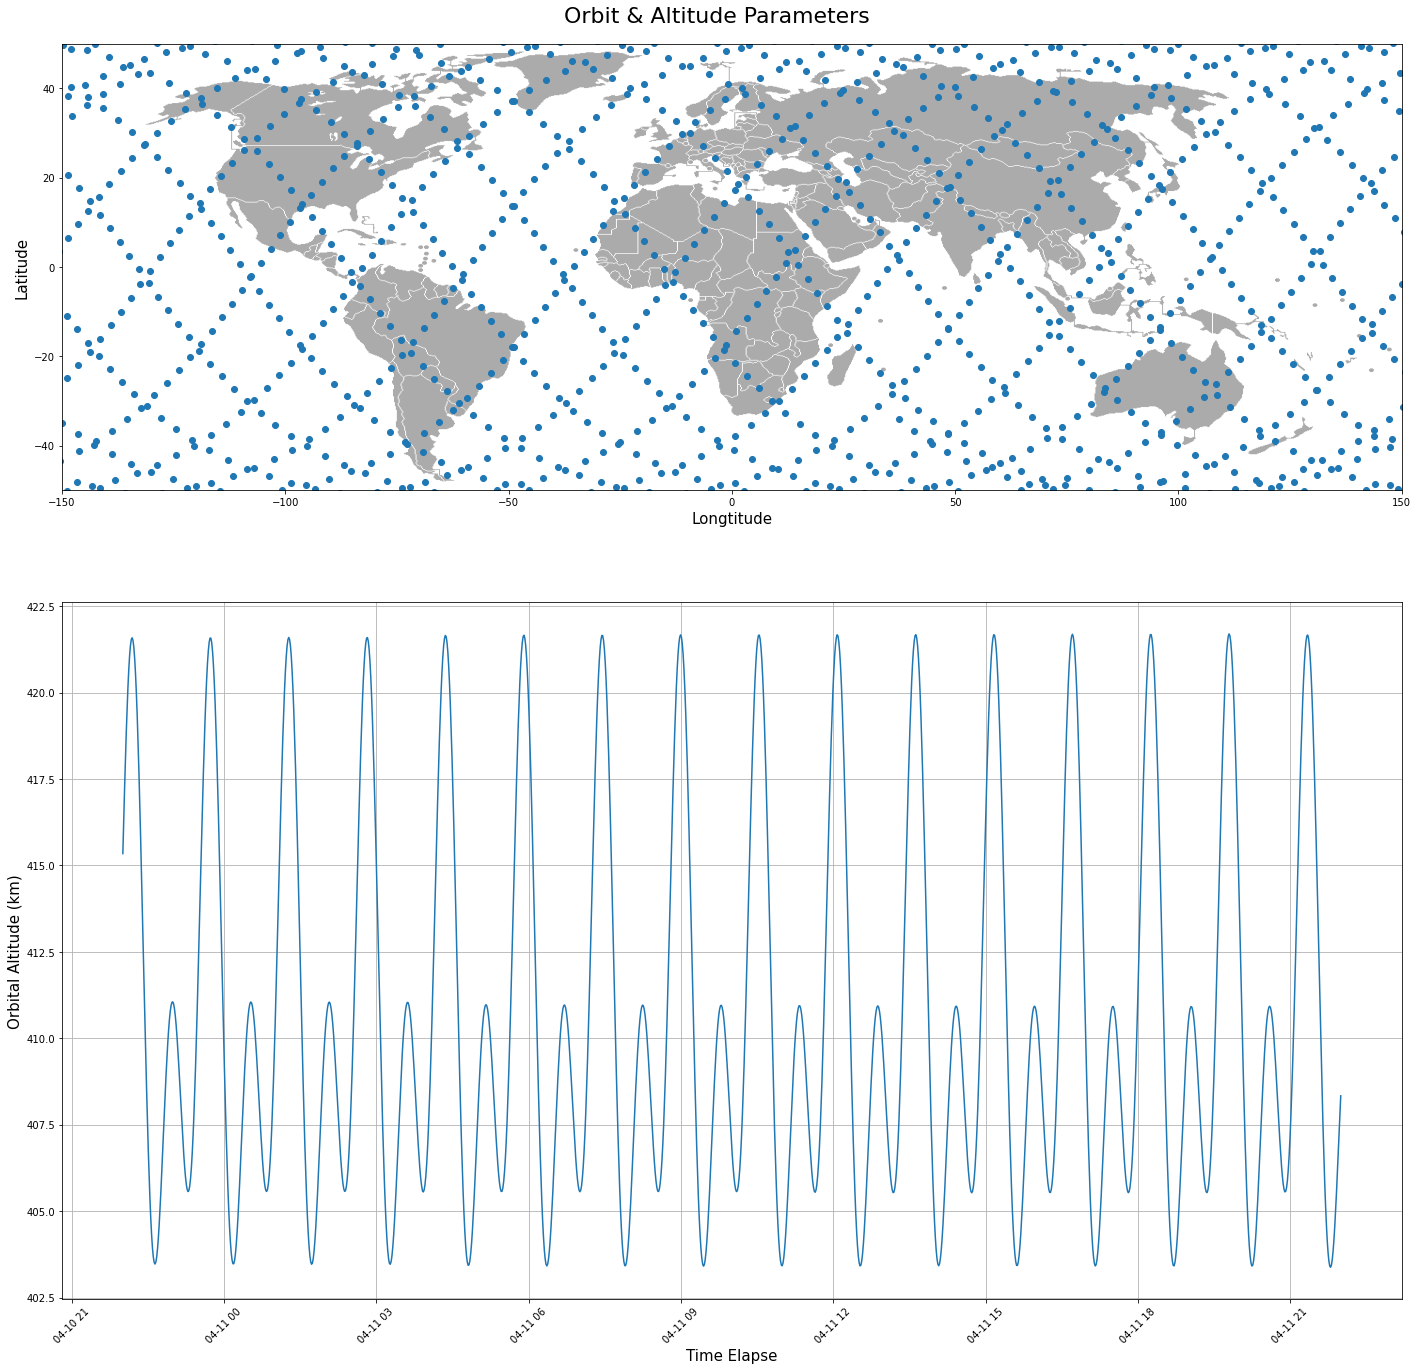

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,20))
fig.suptitle('Orbit & Altitude Parameters', fontsize=22, ha = 'center')
#plot long/lat and xy labels
ax1.scatter(issData['Longtitude'], issData['Latitude'])
ax1.set_ylabel('Latitude',fontsize=15)
ax1.set_xlabel('Longtitude', fontsize=15)
#plot altitude over time and xy labels    
ax2.plot(issData['Altitude'])
ax2.set_ylabel('Orbital Altitude (km)',fontsize=15)
ax2.set_xlabel('Time Elapse', fontsize=15)
#add picture of Earth in the background since data are Long/Lat
ax1.imshow(mapImage, extent = [-150,150,-50,50,])
#rotate tick marks add grid 
plt.setp(ax2.get_xticklabels(), rotation = 45)
ax2.grid()
#layout correction
fig.tight_layout(rect=[0,0.03,0.99,1.07])

#fig.show() #uncomment to see plot if you are not using inline config
#fig.savefig("ISS Orbital Parameters.png", dpi = 700) #uncomment to save fig

# Gray vs Sievert Radiation

Resource: www.wikipedia.com

1 Gy = 1 joule/kilogram – a physical quantity. 1 Gy is the deposit of a joule of radiation energy per kg of matter or tissue.
The sievert – quantity H - Dose equivalent

1 Sv = 1 joule/kilogram – a biological effect. The sievert represents the equivalent biological effect of the deposit of a joule of radiation energy in a kilogram of human tissue. The equivalence to absorbed dose is denoted by Q.

# Sievert Radiation Plotting

In [5]:
#find the average value and use it as a reference point for high/low measurements
avgGrayRadValue = round(issData['Avg_Dose_Rate'].mean(), 2) #uGv - rounded at 2nd dec
avgSvRadValue = round(issData['Avg_EQV_Dose_Rate'].mean(), 2) #uSv - rounded at 2nd dec

#create subsets to examine uGy/ uSv Radiation by using the average as a reference point
#all subsets contain usV/uGy radiation levels but for different averages
peakGrayRad = issData.loc[issData["Avg_Dose_Rate"]>avgGrayRadValue] #uGy selected
normGrayRad = issData.loc[issData["Avg_Dose_Rate"]<=avgGrayRadValue] #uGy selected
peakSvRad = issData.loc[issData["Avg_EQV_Dose_Rate"]> avgSvRadValue] #uSv selected 
normSvRad = issData.loc[issData["Avg_EQV_Dose_Rate"]<= avgSvRadValue] #uSv selected

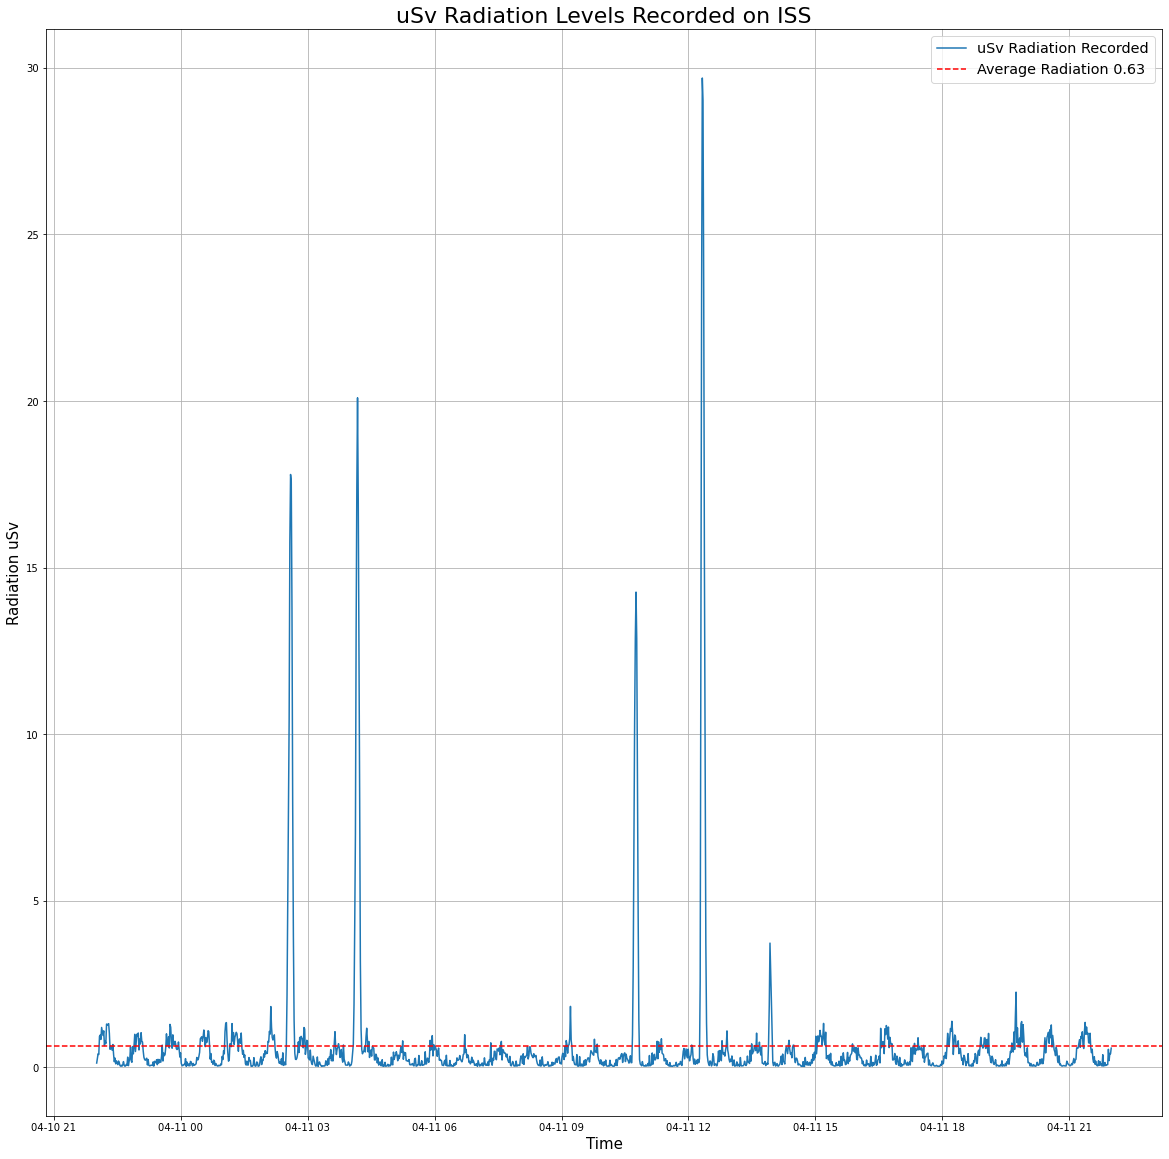

In [6]:
#print radiation levels and average value as mask
fig,ax = plt.subplots(figsize=(20,20))
ax.plot(issData['Avg_EQV_Dose_Rate']) # lnx is handle for legend
ax.axhline(y=avgSvRadValue, color='r', linestyle='--')
#set labels and title
ax.set_ylabel('Radiation uSv',fontsize=15)
ax.set_xlabel('Time', fontsize=15)
plt.title('uSv Radiation Levels Recorded on ISS', fontsize='22')
#add grid and legend box
ax.grid()
ax.legend(['uSv Radiation Recorded', 'Average Radiation '+str(avgSvRadValue)], fontsize = 'x-large')

#fig.show() #uncomment to see plot if you are not using inline config
#fig.savefig("ISS Sievert Radiation.png", dpi=700) #uncomment to save figure

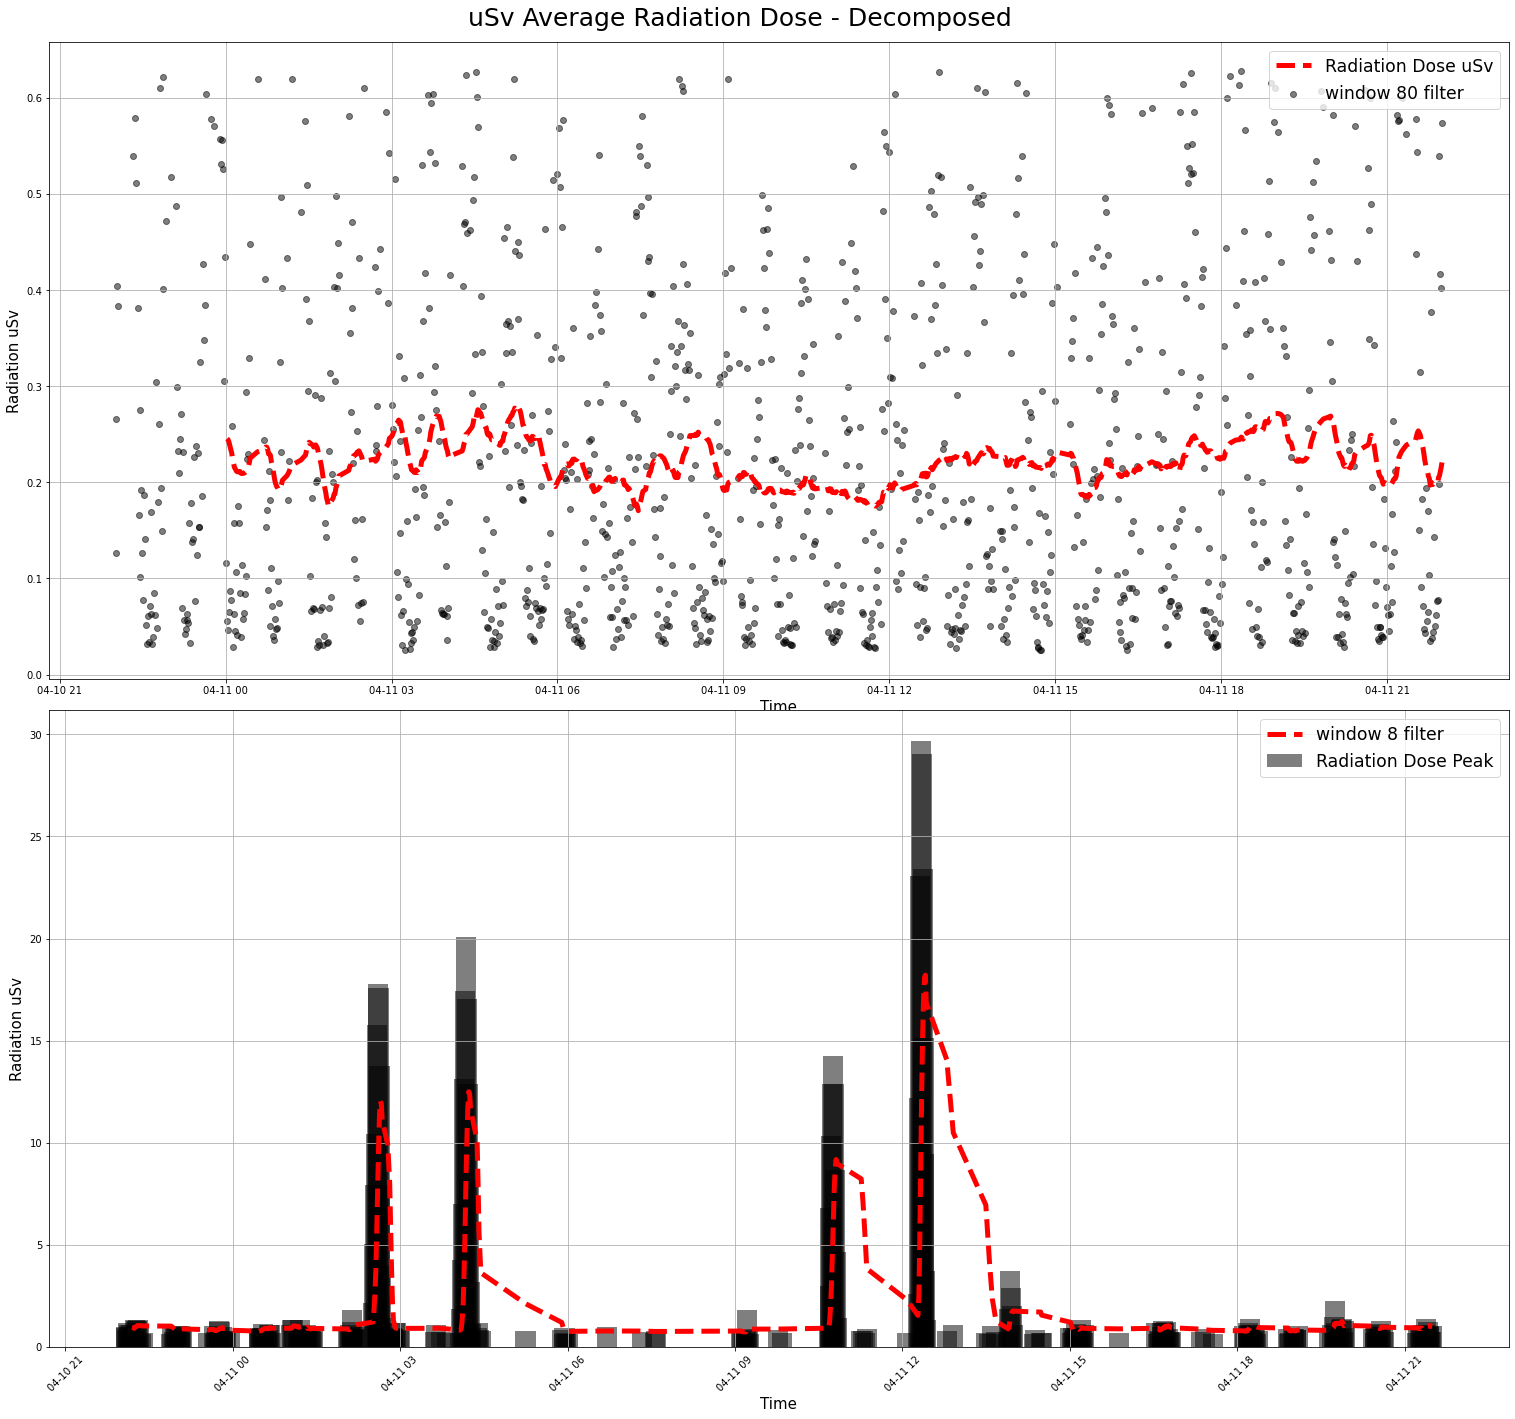

In [7]:
#Sievert Radiation decomposed to spikes- peaks 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,20))
fig.suptitle(' uSv Average Radiation Dose - Decomposed', fontsize=25, ha = 'center')
fig.tight_layout(rect=[0.0,0.03,1.05,0.99])
#primary plot
ax1.scatter(normSvRad.index, normSvRad['Avg_EQV_Dose_Rate'], color = 'black', alpha=0.5)
ax1.plot(normSvRad.index, normSvRad['Avg_EQV_Dose_Rate'].rolling(window=80).mean(), 'r--', linewidth = '5')
ax1.set_ylabel('Radiation uSv',fontsize=15)
ax1.set_xlabel('Time', fontsize=15)
ax1.legend(["Radiation Dose uSv", "window 80 filter"],fontsize = 'xx-large', loc=1)
ax1.grid()
#secondary plot
ax2.bar(peakSvRad.index,peakSvRad['Avg_EQV_Dose_Rate'],width =0.015, color = 'black', alpha=0.5)
ax2.plot(peakSvRad.index, peakSvRad['Avg_EQV_Dose_Rate'].rolling(window=8).mean(),'r--', linewidth = '5')
ax2.set_ylabel('Radiation uSv',fontsize=15)
ax2.set_xlabel('Time', fontsize=15)
ax2.legend(["window 8 filter", "Radiation Dose Peak"], fontsize = 'xx-large', loc=1)
ax2.grid()

#rotate tick marks 
plt.setp(ax2.get_xticklabels(), rotation = 45)
plt.show() #uncomment to see plot if you dont use inline config
#fig.savefig("uSv_Rad.png", dpi=700) #uncomment to save plot

# Gray Radiation Plotting

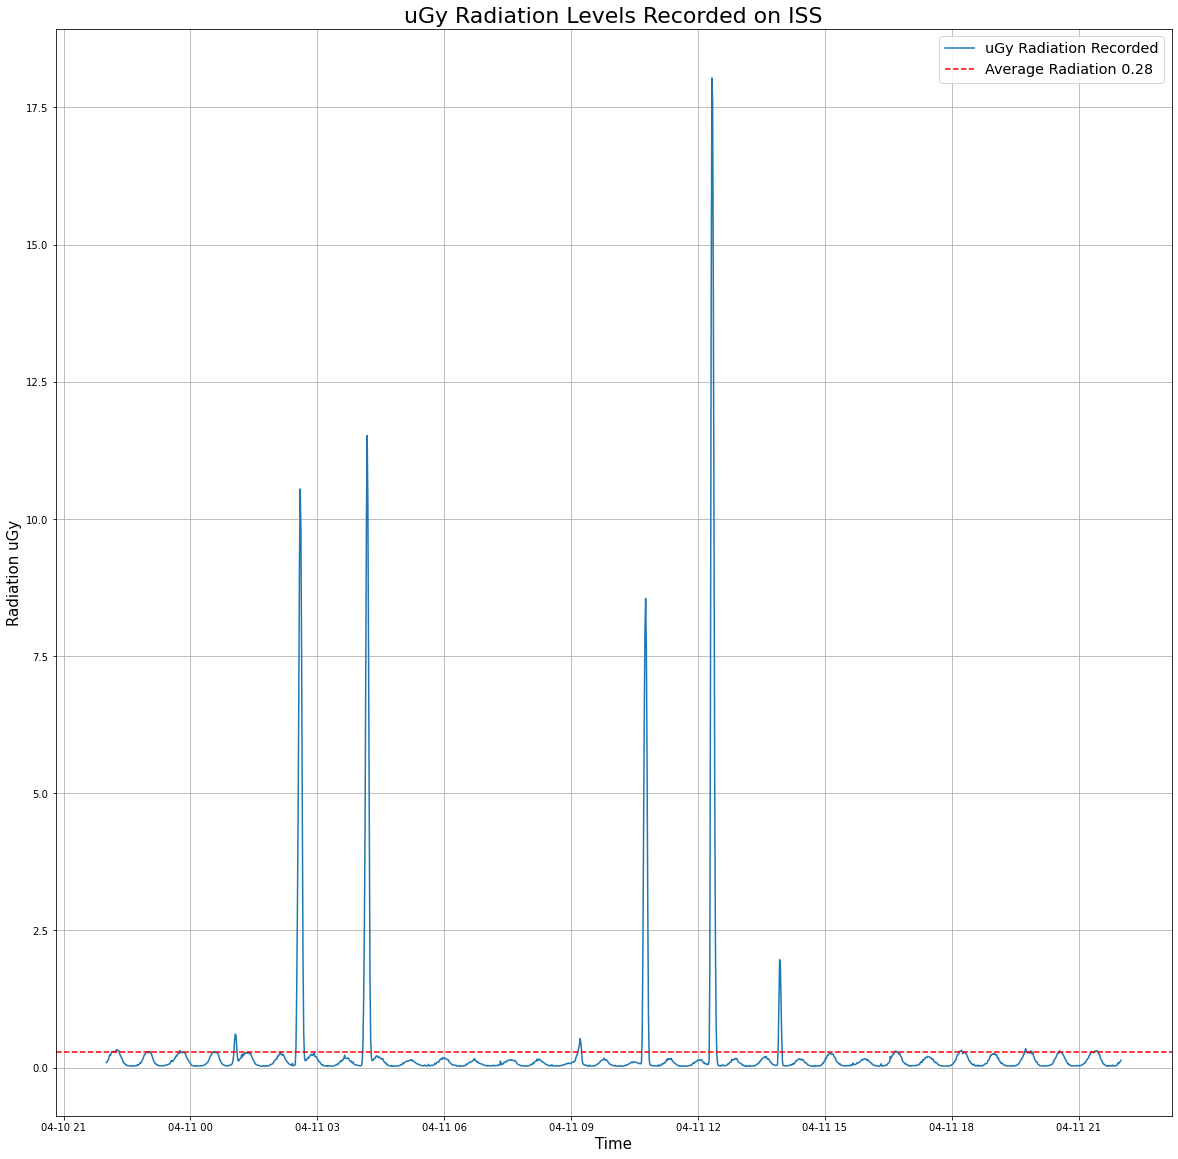

In [8]:
#Create subplots
fig,ax = plt.subplots(figsize=(20,20))
#plot Rad data and average
ax.plot(issData['Avg_Dose_Rate']) 
ax.axhline(y=avgGrayRadValue, color='r', linestyle='--')
#set labels and title
ax.set_ylabel('Radiation uGy',fontsize=15)
ax.set_xlabel('Time', fontsize=15)
plt.title('uGy Radiation Levels Recorded on ISS', fontsize='22')
#grid and legend box
ax.grid()
ax.legend(['uGy Radiation Recorded', 'Average Radiation '+str(avgGrayRadValue)], fontsize = 'x-large')

#fig.show() #uncomment to see plot if you are not using inline config
#fig.savefig('ISS Gray Rad.png', dpi = 700) #uncomment to export .png

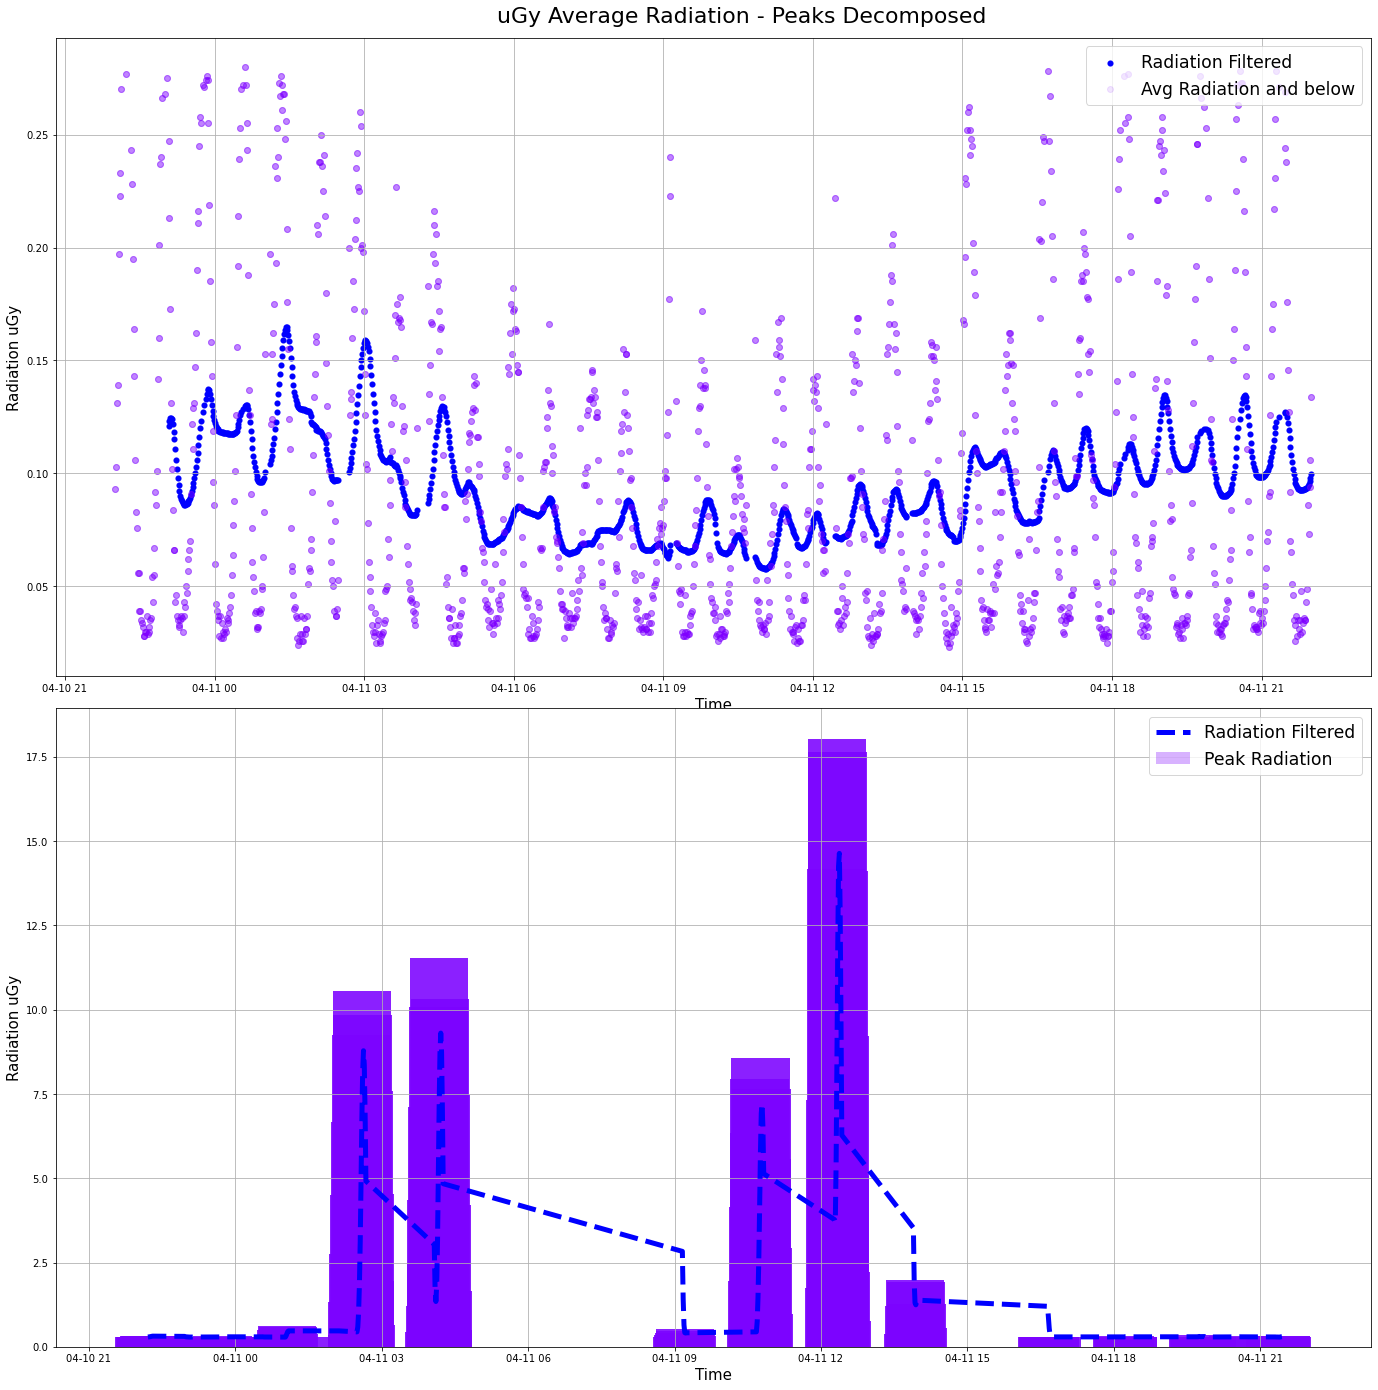

In [9]:
# Gray radiation decomposed to peak and average datasets
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(20,20))
fig.suptitle('uGy Average Radiation - Peaks Decomposed', fontsize=22, ha = 'center')
fig.tight_layout(rect=[0,0.03,0.95,0.99])
#colormap setup
colors = iter(cm.rainbow(np.linspace(0, 1, len(normGrayRad.index))))
ax.scatter(normGrayRad.index,normGrayRad['Avg_Dose_Rate'].rolling(window=50).mean() ,linewidths=.1, color='b')
for y in normGrayRad:
    ax.scatter(normGrayRad.index,normGrayRad['Avg_Dose_Rate'], color=next(colors), alpha=.1 )
    
#labels, grid and title
ax.set_ylabel('Radiation uGy', fontsize= '15')
ax.set_xlabel('Time', fontsize = '15')
ax.grid()   
ax.legend(['Radiation Filtered', 'Avg Radiation and below'], fontsize = 'xx-large', loc=1)

#secondary plot peaks-only
for y in peakGrayRad:
    ax2.bar(peakGrayRad.index,peakGrayRad['Avg_Dose_Rate'], color=next(colors), alpha=.3, width =0.05)


ax2.plot(peakGrayRad.index,peakGrayRad['Avg_Dose_Rate'].rolling(window=5).mean(), 'b--', linewidth=5)
#labels and title
ax2.set_xlabel('Time', fontsize= '15')
ax2.set_ylabel('Radiation uGy', fontsize = '15')
ax2.legend(['Radiation Filtered', 'Peak Radiation'], fontsize = 'xx-large', loc=1)

#fig.show() #uncomment to see plot if you are not using inline config
#fig.savefig('ISS_Gray_Rad.png', dpi = 700) #uncomment to export .png

ax2.grid()

# Visual Map of the Radiation Intesity over Orbit (Gray/Sievert)

Text(0.5, 1.0, "Visualization of the Sievert radiation level over ISS' orbit")

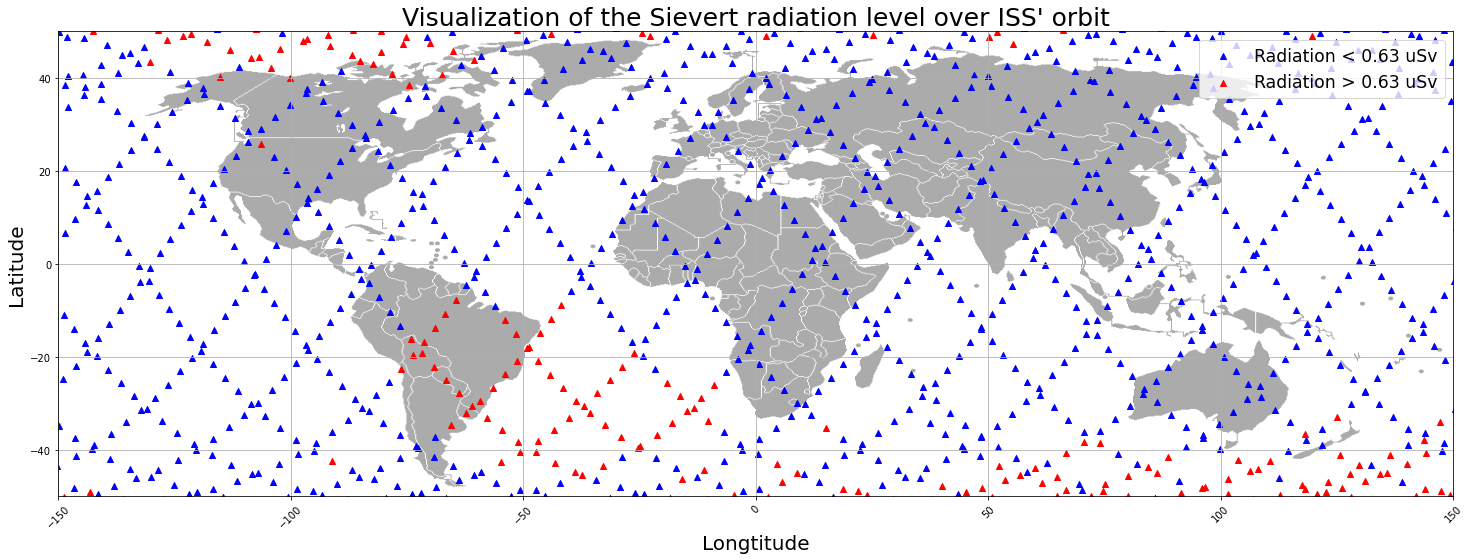

In [10]:
#fig, axis and plot creation
fig, ax = plt.subplots(figsize=(25,25))
   
ax.scatter(normSvRad['Longtitude'], normSvRad['Latitude'], marker = '^', color = 'blue' )
ax.scatter(peakSvRad['Longtitude'], peakSvRad['Latitude'], marker = '^', color = 'red')
ax.grid()  
#add map image
ax.imshow(mapImage, extent = [-150,150,-50,50,]) 
#labels and titles
ax.set(xlabel = 'Longtitude',ylabel = 'Latitude')
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
#rotate tick marks 
plt.setp(ax.get_xticklabels(), rotation = 45)
plt.legend(["Radiation < "+str(avgSvRadValue)+" uSv","Radiation > "+str(avgSvRadValue)+" uSv"]
           ,fontsize = "xx-large", loc = 1)
plt.title ("Visualization of the Sievert radiation level over ISS' orbit", fontsize = 25)
    
#fig.show() #uncomment if not inline config is used
#fig.savefig('Sievert_Rad_Map.png' ,dpi =700)
    

Text(0.5, 1.0, "Visualization of the Gray radiation level over ISS' orbit")

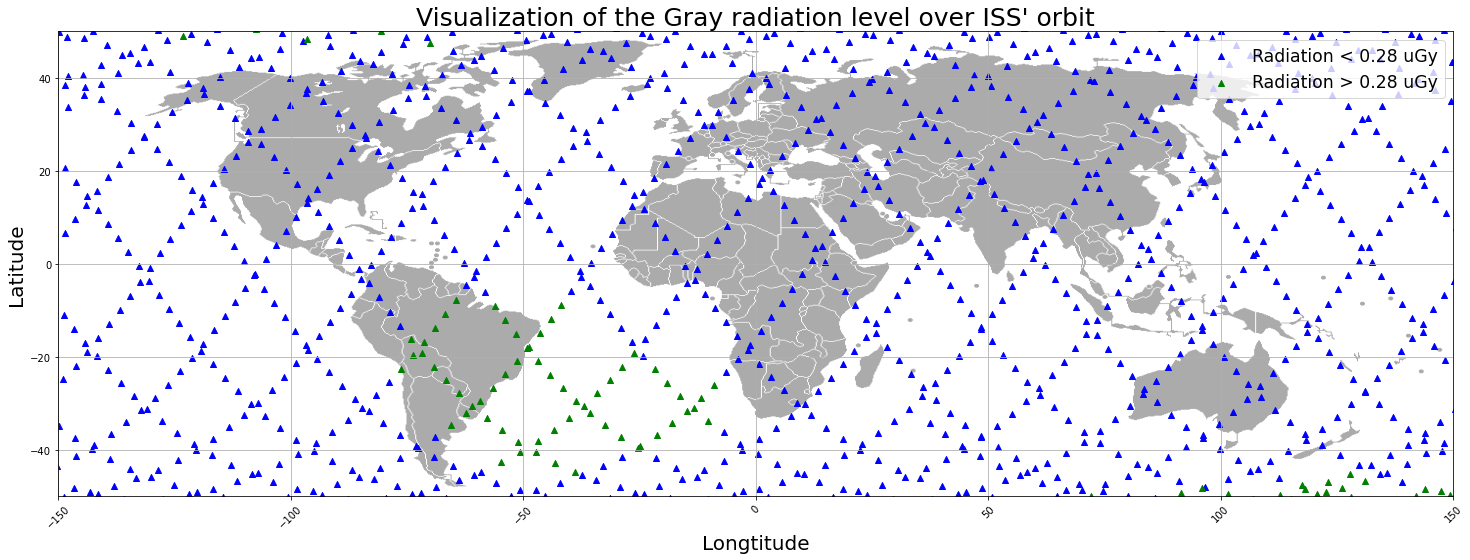

In [17]:
#fig, axis and plot creation
fig, ax = plt.subplots(figsize=(25,25))
  
ax.scatter(normGrayRad['Longtitude'], normGrayRad['Latitude'], marker = '^', color = 'blue' )
ax.scatter(peakGrayRad['Longtitude'], peakGrayRad['Latitude'], marker = '^', color = 'green')
ax.grid()  
#add map image
ax.imshow(mapImage, extent = [-150,150,-50,50,]) 
#labels and titles
ax.set(xlabel = 'Longtitude',ylabel = 'Latitude')
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
#rotate tick marks 
plt.setp(ax.get_xticklabels(), rotation = 45)
plt.legend(["Radiation < "+str(avgGrayRadValue)+" uGy","Radiation > "+str(avgGrayRadValue)+" uGy"]
           ,fontsize = "xx-large", loc = 1)
plt.title ("Visualization of the Gray radiation level over ISS' orbit", fontsize = 25)
    
#fig.show()
#fig.savefig('Gray_Rad_Visual.png' ,dpi =700)
    

# Conclusion

Resources: https://astronomy.com/news/2021/02/hidden-spaceflight-danger-the-south-atlantic-anomaly

The Sievert and Gray Radiations both follow the same trend as seen from the graphs above. The "rolling" function of pandas used in the graphs above, helps us visualize the rate of change and create a simple trend for the duration of observations. While the ISS remains outside the poles and the South Atlantic Anomaly region, the radiation levels remain low with a light cyclical trend that is consistent with the orbiting profile of the satellite.

The visual maps of the Gray and Sievert Radiation reveals that the ISS experiences higher-than-usual radiation levels over South America and ocassionally at the poles. This is expected as the magnetic field of the Earth is weakest as the poles and over the South Atlantic region where the South Atlantic Anomaly exists.

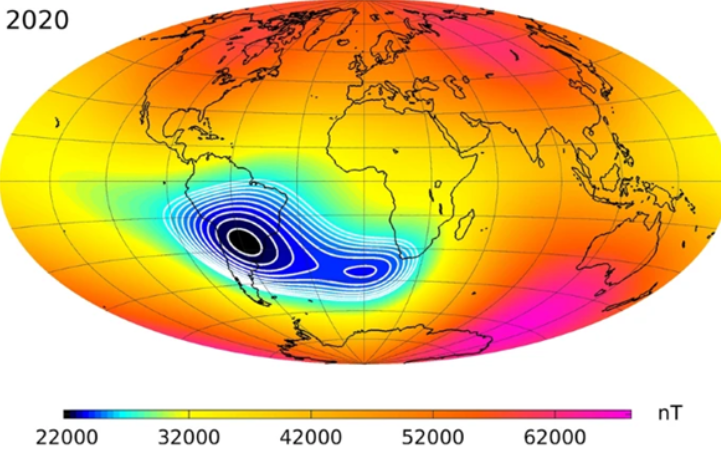

## Appendix
A smoothing filter that can be used instead of the .rolling window - if necessary 

In [12]:
def smooth(x,window_len=50,window='flat'):
    #Scipy-cookbook

    if x.ndim != 1:
        raise ValueError( "smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError( "Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y




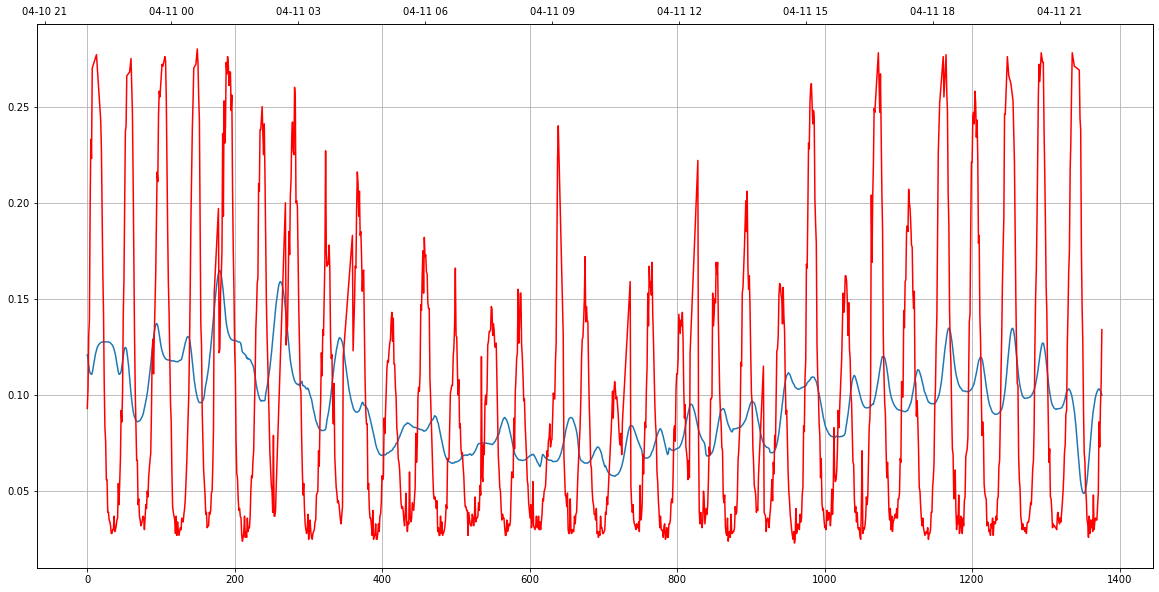

In [13]:
filteredRadNorm = smooth(normGrayRad['Avg_Dose_Rate'])
normGrayRadIndex = np.array([normGrayRad.index])

#fig, axis and plot creation
fig, ax = plt.subplots(figsize=(20,10))
ax1 = ax.twiny()

ax.plot(filteredRadNorm)
ax1.plot(normGrayRad['Avg_Dose_Rate'], 'r')
    
ax.grid()